<a href="https://colab.research.google.com/github/FelixSnz/MachineLearningTests/blob/master/videoexample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, model_selection, datasets
import pickle

In [ ]:
data = datasets.load_diabetes()
print(data.feature_names)
print(data.target)

X, y = datasets.load_diabetes(return_X_y=True)

In [ ]:
print(X.shape)
x_train = X[:-20]
x_test = X[-20:]

y_train = y[:-20]
y_test = y[-20:]

x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=.1)

In [ ]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
acc = model.score(x_test, y_test)
print(acc)
print('coeficients:', '\n', model.coef_)
print('Intercept:', '\n', model.intercept_)

In [ ]:
with open("diabetes.pickle", 'wb') as f:
  pickle.dump(model, f)

pickle_in = open("diabetes.pickle", 'rb')
model1 = pickle.load(pickle_in)

print(model1.score(x_test, y_test))

In [ ]:
n = 10000
best_acc = 0

for _ in range(n):
  x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=.05)
  model = linear_model.LinearRegression()
  model.fit(x_train, y_train)
  acc = model.score(x_test, y_test)
  if acc > best_acc:
    with open("diabetes.pickle", 'wb') as f:
      pickle.dump(model, f)
    best_acc = acc
    print(best_acc)

  

In [ ]:
predictions = model.predict(x_test)

for i in range(len(predictions)):
  print("Actual:", y_test[i], "predicted:", predictions[i])

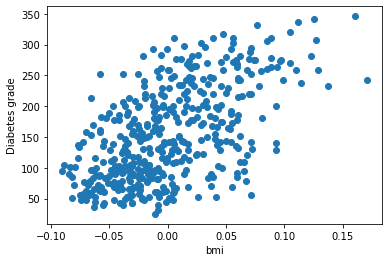

In [52]:
plt.scatter(X[:,2], y)

plt.xlabel(data.feature_names[2])
plt.ylabel("Diabetes grade")
plt.show()